In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
netflix_df = pd.read_csv('netflix_data.csv')

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [5]:
netflix_df.shape

(4812, 11)

# Steps:
1) Data clearning: 
    - check for consistency between values and rows 
    - check for missing value in any row 
    - check for data formating 

2) Analysis: 
    - Column Type: 
        - how many type of movies in this column 
        - what are the percentage contribution between the types 
        - what are the product components based on the release year
        - what are the genre per each type  

    - Column Director: 
        - What are the top director by the number of type producted?  
        - How frequent top director release a product 
    
    - Column Cast:  
        - Who appear the most? top ten 20 casts and where are they from  

    - Column Country:  
        - Top production country per year
        - Top production country by type and genre 

    - Column Date_added: to double check on the meaning of this value 
        - Assume this is when the movie being added to netflix, then check check for the gap of between date_add versus the time is being realeased 
        - How offen a show is add into the platform? 
        - What are the period of date_added (min, max)
        - Check for monthly trend by year
            => most month being upload  
        - Check for daily trend by year.  
            => most day being upload

    - Column Release year:  
        - what are the most popular type and gen for each period of year 

    - Column Duration: 
        - by type, 
        - by gen 
    
    3) Write up a summary based on the finding
        - What are the observations? 
        - What can be done/research further to make dataset make more sense? 


### Data Clearning


In [60]:
netflix_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         4812 non-null   object        
 1   type            4812 non-null   object        
 2   title           4812 non-null   object        
 3   director        4812 non-null   object        
 4   cast            4812 non-null   object        
 5   country         4812 non-null   object        
 6   date_added      4808 non-null   datetime64[ns]
 7   release_year    4812 non-null   int64         
 8   duration        4812 non-null   int64         
 9   description     4812 non-null   object        
 10  genre           4812 non-null   object        
 11  movie_duration  0 non-null      object        
 12  tv_seasons      0 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 488.8+ KB


1) there is no missing value in the data
2) the data_added data is object instead of date time => to adjust the format 

In [61]:
# Convert the 'date_added' column to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')


In [62]:
netflix_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         4812 non-null   object        
 1   type            4812 non-null   object        
 2   title           4812 non-null   object        
 3   director        4812 non-null   object        
 4   cast            4812 non-null   object        
 5   country         4812 non-null   object        
 6   date_added      4808 non-null   datetime64[ns]
 7   release_year    4812 non-null   int64         
 8   duration        4812 non-null   int64         
 9   description     4812 non-null   object        
 10  genre           4812 non-null   object        
 11  movie_duration  0 non-null      object        
 12  tv_seasons      0 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 488.8+ KB


In [63]:
print(netflix_df['date_added'].head())


0   2016-12-23
1   2018-12-20
2   2017-11-16
3   2020-01-01
4   2017-07-01
Name: date_added, dtype: datetime64[ns]


In [64]:
# the data has 4812 entries, but data_added only has 4808 value 

# Find and print the rows where 'date_added' is missing (NaT)
missing_date_added = netflix_df[netflix_df['date_added'].isna()]

# Print the rows with missing 'date_added' values
print(missing_date_added)

# after reviewing the missing date value in excel file. I learn that these rows do have value, yet the formatting of these value is different, that what cause the function to remove the value.
# one way that I think of is: update the formating of the file in inside excel, then rerun the workbook  


     show_id     type            title                 director  \
203     s285  TV Show  Abnormal Summit  Jung-ah Im, Seung-uk Jo   
1339   s2131  TV Show     Father Brown               Ian Barber   
2477   s3952  TV Show             Mars            Everardo Gout   
3292   s5292  TV Show      Royal Pains        Jay Chandrasekhar   

                                                   cast         country  \
203            Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo     South Korea   
1339  Mark Williams, Sorcha Cusack, Nancy Carroll, A...  United Kingdom   
2477  Jihae, Alberto Ammann, Clémentine Poidatz, Ana...   United States   
3292  Mark Feuerstein, Paulo Costanzo, Reshma Shetty...   United States   

     date_added  release_year  duration  \
203         NaT          2017         2   
1339        NaT          2017         6   
2477        NaT          2018         2   
3292        NaT          2016         8   

                                            description             genr

In [65]:
# learn that the file has 11 columns and 4812 rows  

In [66]:
# I want to learn how many values are available for each column, and what are the values of them  

: 

### check for duration format of each row's type 

In [31]:
# Inspect the 'duration' column to understand its structure
print(netflix_df[['type', 'duration']].head())


      type  duration
0    Movie        93
1    Movie        78
2    Movie        80
3    Movie       123
4  TV Show         1


note: question is, what if the first 5 rows only contain type: Movie => therefore it is not able to tell the different in duration. 
=> getting samples for 'Movies' and  'TV Show' 

In [41]:
# Check a few rows where the content type is 'Movie'
movies_sample = netflix_df[netflix_df['type'] == 'Movie'][['type', 'duration']].head(10)
print("Movies Sample:")
print(movies_sample)

# Calculate statistics for movie durations
movies_stats = netflix_df[netflix_df['type'] == 'Movie']['duration'].describe()

print("\nMovies Statistics:")
print(movies_stats)


Movies Sample:
     type  duration
0   Movie        93
1   Movie        78
2   Movie        80
3   Movie       123
5   Movie        95
6   Movie       119
7   Movie       118
8   Movie       143
9   Movie       103
10  Movie        89

Movies Statistics:
count    4677.000000
mean      102.384648
std        26.428435
min         8.000000
25%        89.000000
50%       100.000000
75%       117.000000
max       253.000000
Name: duration, dtype: float64


In [52]:
# Draw a box plot for movie durations
plt.figure(figsize=(8, 6))
plt.boxplot(vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Set title and labels
plt.title('Box Plot of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()


TypeError: boxplot() missing 1 required positional argument: 'x'

<Figure size 800x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Convert 'duration' column for movies to numeric (in case it's still in string format)
netflix_df['duration_numeric'] = netflix_df.apply(
    lambda row: int(row['duration'].replace(' min', '')) if isinstance(row['duration'], str) and row['type'] == 'Movie' else None, axis=1
)

# Filter the movie durations for visualization
movies_durations = netflix_df[netflix_df['type'] == 'Movie']['duration_numeric']

# Plot a histogram for movie durations
plt.figure(figsize=(10, 6))
plt.hist(movies_durations.dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations (in minutes)', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [38]:
# Check a few rows where the content type is 'TV Show'
tv_shows_sample = netflix_df[netflix_df['type'] == 'TV Show'][['type', 'duration']].head(10)
print("\nTV Shows Sample:")
print(tv_shows_sample)

# Calculate statistics for TV show seasons
tv_shows_stats = netflix_df[netflix_df['type'] == 'TV Show']['duration'].describe()

print("\nTV Shows Statistics:")
print(tv_shows_stats)



TV Shows Sample:
        type  duration
4    TV Show         1
94   TV Show         1
151  TV Show         1
181  TV Show         1
197  TV Show         1
203  TV Show         2
231  TV Show         1
238  TV Show         1
296  TV Show         1
371  TV Show         1

TV Shows Statistics:
count    135.000000
mean       1.940741
std        2.118726
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       15.000000
Name: duration, dtype: float64


In [48]:
# Extract movie duration in minutes for rows where type is 'Movie'
netflix_df['movie_duration'] = netflix_df.apply(
    lambda row: int(row['duration'].replace(' min', '')) if isinstance(row['duration'], str) and row['type'] == 'Movie' else None, axis=1
)


In [49]:
# Extract TV show seasons for rows where type is 'TV Show'
netflix_df['tv_seasons'] = netflix_df.apply(
    lambda row: int(row['duration'].replace(' Season', '').replace('s', '')) if isinstance(row['duration'], str) and row['type'] == 'TV Show' else None, axis=1
)


In [50]:
# Display a few rows to verify the new columns
print(netflix_df[['type', 'duration', 'movie_duration', 'tv_seasons']].head(10))


      type  duration movie_duration tv_seasons
0    Movie        93           None       None
1    Movie        78           None       None
2    Movie        80           None       None
3    Movie       123           None       None
4  TV Show         1           None       None
5    Movie        95           None       None
6    Movie       119           None       None
7    Movie       118           None       None
8    Movie       143           None       None
9    Movie       103           None       None


In [39]:
cols_type = {} 
for item in netflix_df['type']:
    if item not in cols_type: 
        cols_type[item] = 1
    else: 
        cols_type[item] += 1
print (cols_type)

{'Movie': 4677, 'TV Show': 135}


In [40]:
cols_country = {} 
for item in netflix_df['country']:
    if item not in cols_country: 
        cols_country[item] = 1
    else:
        cols_country[item] += 1
        
sorted_cols_country = sorted(cols_country.items(), key=lambda x: x[1], reverse=True)
    
print(sorted_cols_country)

[('United States', 1886), ('India', 864), ('United Kingdom', 311), ('Canada', 155), ('France', 133), ('Spain', 112), ('Egypt', 91), ('Turkey', 81), ('Japan', 81), ('Mexico', 74), ('Philippines', 74), ('Indonesia', 73), ('Hong Kong', 73), ('Nigeria', 65), ('Germany', 60), ('Australia', 50), ('South Korea', 48), ('China', 47), ('Brazil', 47), ('Argentina', 46), ('Thailand', 40), ('Italy', 38), ('South Africa', 29), ('Poland', 19), ('Pakistan', 18), ('Taiwan', 18), ('Netherlands', 17), ('United Arab', 17), ('Ireland', 17), ('Chile', 17), ('Denmark', 16), ('Malaysia', 16), ('New Zealand', 13), ('Colombia', 13), ('Lebanon', 13), ('Israel', 11), ('Singapore', 10), ('Norway', 10), ('Romania', 9), ('Uruguay', 7), ('Saudi Arabia', 7), ('Sweden', 6), ('Belgium', 6), ('Switzerland', 6), ('Bulgaria', 5), ('Vietnam', 5), ('Russia', 5), ('Austria', 5), ('Peru', 4), ('Ghana', 4), ('Kuwait', 4), ('Hungary', 4), ('Iceland', 3), ('Kenya', 3), ('Serbia', 3), ('Czech Republic', 3), ('Portugal', 2), ('Finl

In [15]:
# Extract top 20 countries and their counts
top_20_countries = sorted_cols_country[:20]
countries = [x[0] for x in top_20_countries]
movie_counts = [x[1] for x in top_20_countries]


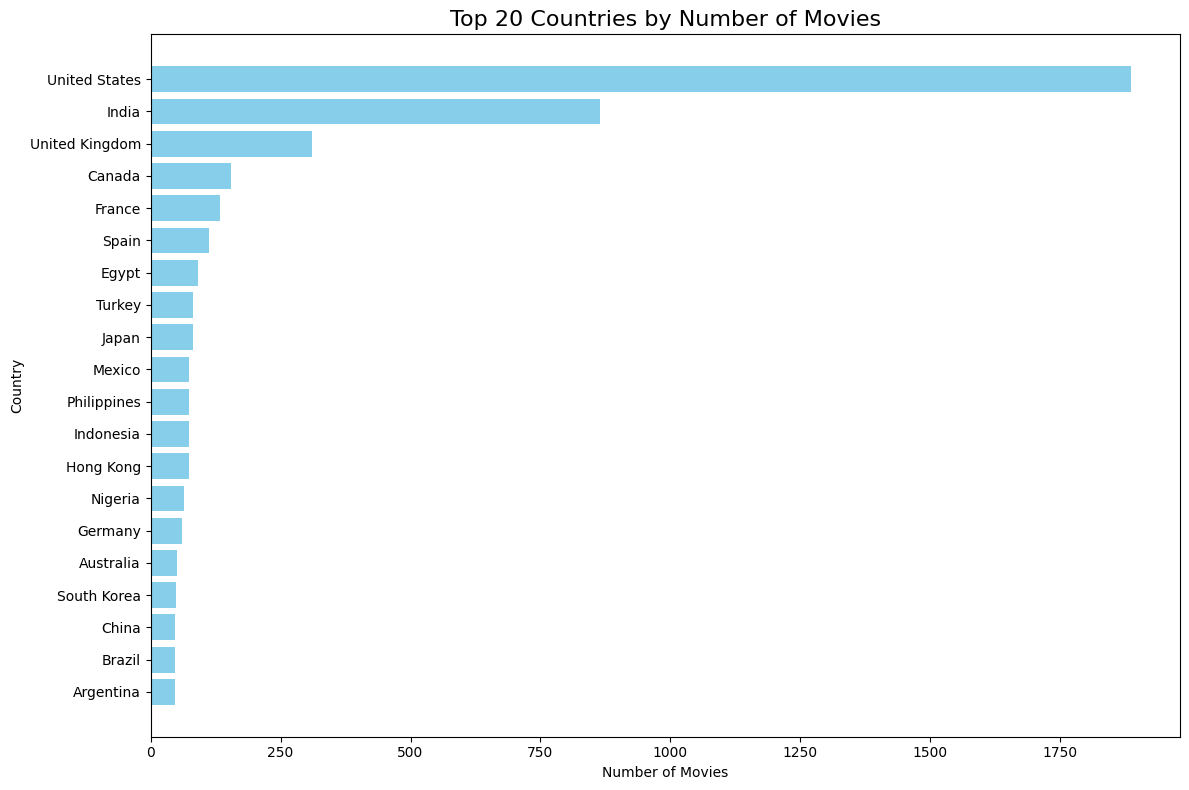

In [19]:
# Create a bar plot for top 20 countries
plt.figure(figsize=(12, 8))
plt.barh(countries, movie_counts, color='skyblue')

# Add titles and labels
plt.title('Top 20 Countries by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=10)
plt.ylabel('Country', fontsize=10)

# Invert the y-axis to have the highest bar at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Country')

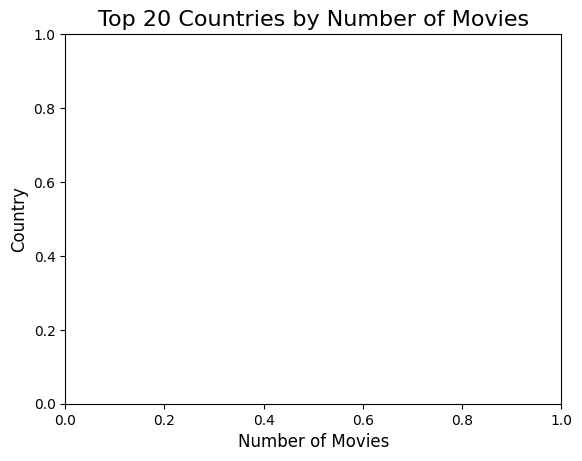

In [17]:
# Add titles and labels
plt.title('Top 20 Countries by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=10)
plt.ylabel('Country', fontsize=10)

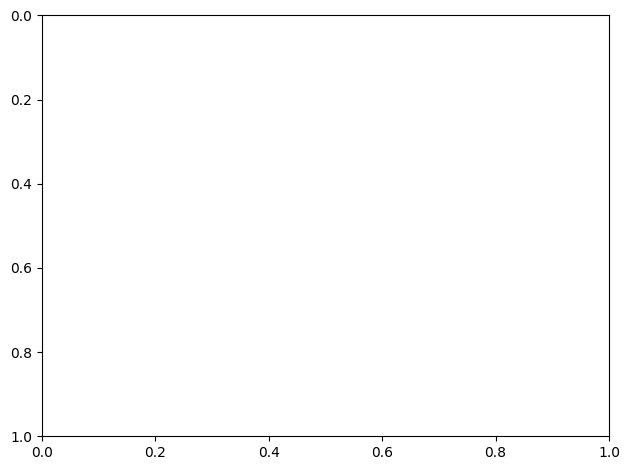